# Analisis y exploración del conjunto de datos con el que vamos a estar trabajando

## Este notebook no contiene ejercicios
El objetivo principal es comprender como estan organizados los datos, cual es la relación entre variables y como estan distribuidos los datos faltantes.

In [20]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("src/marengo_nans.csv", encoding="UTF-8")

In [22]:
df.head()

,date,latitude,longitude,elevation,temperature_2m_mean,temperature_2m_max,temperature_2m_min,precipitation_sum,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,shortwave_radiation_sum,et0_fao_evapotranspiration
0,2020-01-01 00:00:00+00:00,4.674868,-74.187195,2542.0,13.508667,19.367000,8.467,23.900002,42680.883,13.708391,35.280000,20.60,3.446856
1,2020-01-02 00:00:00+00:00,4.674868,-74.187195,2542.0,14.596166,19.317001,11.167,NaN,42684.590,13.493999,33.480000,NaN,3.663233
2,2020-01-03 00:00:00+00:00,4.674868,-74.187195,2542.0,13.248249,20.417000,8.217,1.700000,42688.617,10.446206,30.599998,23.35,4.058897
3,2020-01-04 00:00:00+00:00,4.674868,-74.187195,2542.0,12.804502,19.417000,7.467,1.300000,42692.950,14.058450,37.440000,25.60,4.251072
4,2020-01-05 00:00:00+00:00,4.674868,-74.187195,2542.0,12.331582,18.767000,NaN,0.000000,42697.590,15.391840,36.360000,23.75,3.968409


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        1827 non-null   object 
 1   latitude                    1827 non-null   float64
 2   longitude                   1827 non-null   float64
 3   elevation                   1827 non-null   float64
 4   temperature_2m_mean         1621 non-null   float64
 5   temperature_2m_max          1668 non-null   float64
 6   temperature_2m_min          1643 non-null   float64
 7   precipitation_sum           1652 non-null   float64
 8   daylight_duration           1641 non-null   float64
 9   wind_speed_10m_max          1640 non-null   float64
 10  wind_gusts_10m_max          1649 non-null   float64
 11  shortwave_radiation_sum     1666 non-null   float64
 12  et0_fao_evapotranspiration  1634 non-null   float64
dtypes: float64(12), object(1)
memory 

In [24]:
df["date"] = pd.to_datetime(df["date"], format="ISO8601")

<Axes: >

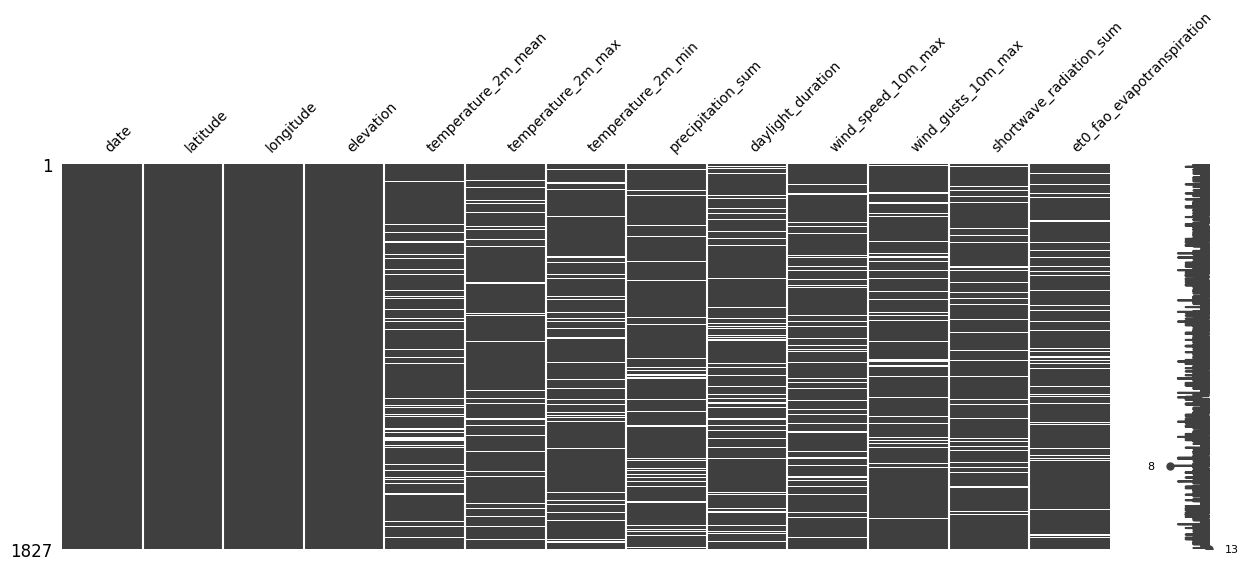

In [25]:
msno.matrix(df, figsize=(15, 5), fontsize=10)

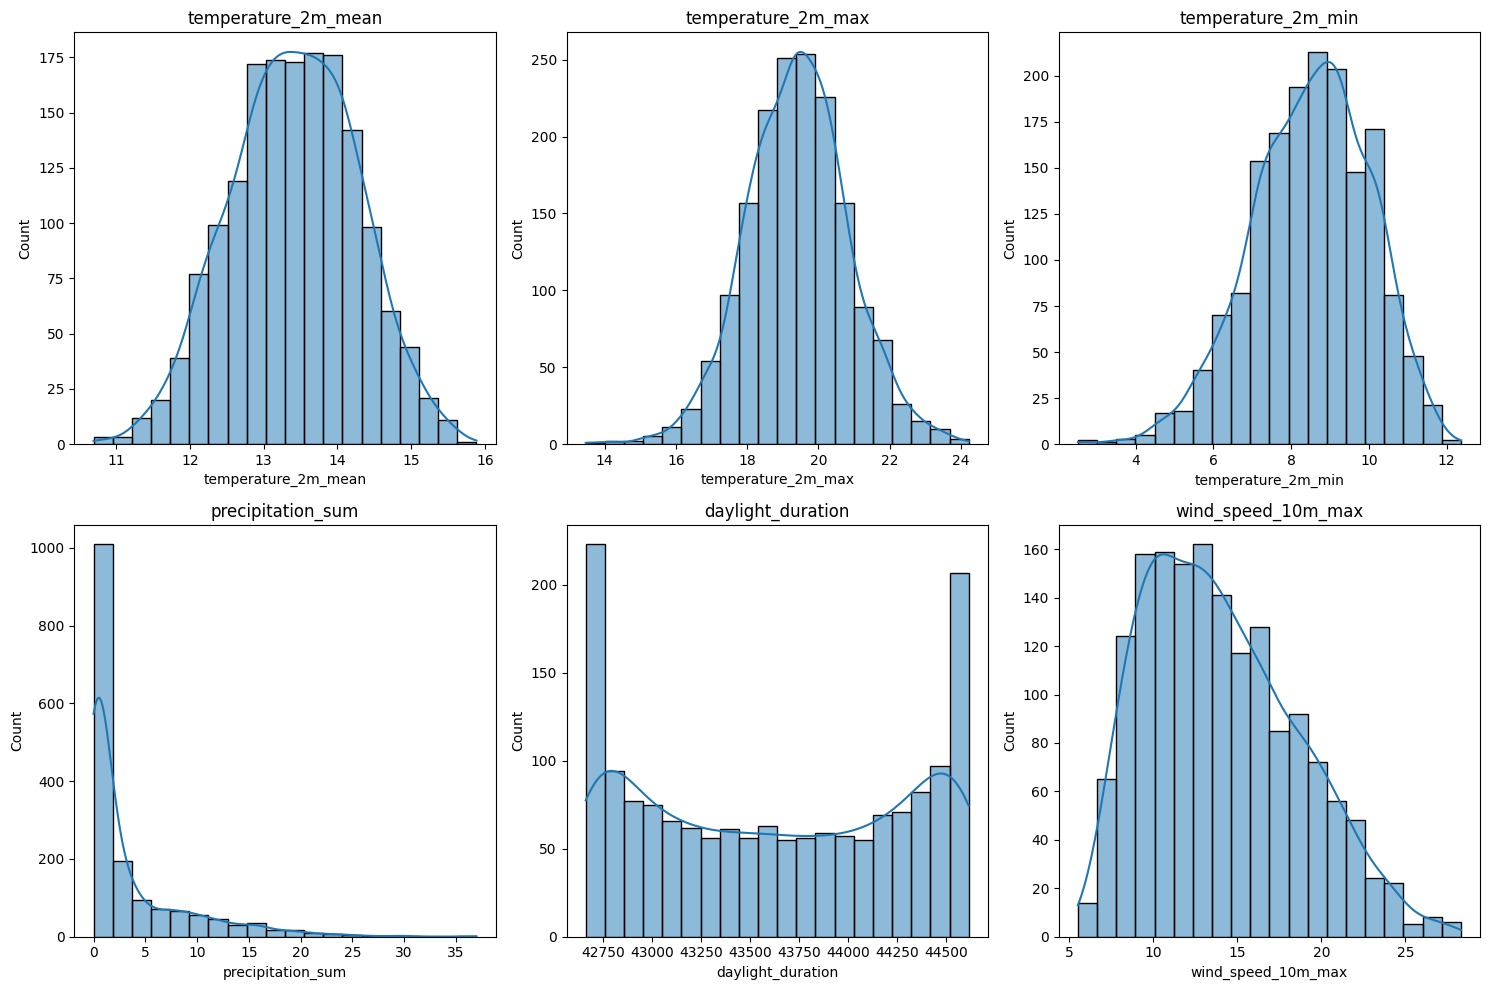

In [26]:
# Same but in a multiple plot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, ax in zip(df.iloc[:,4:].columns, axes.flatten()):
    sns.histplot(df[i], kde=True, bins=20, ax=ax)
    ax.set_title(i)
plt.tight_layout()

Observemos el aspecto de la serie temporal de precipitación comulada para el año 2024 cuando dejamos vacios en los datos faltantes.

/tmp/ipykernel_19189/3285174825.py:2: UserWarning: 
The palette list has fewer values (175) than needed (176) and will cycle, which may produce an uninterpretable plot.
  plot = sns.lineplot(


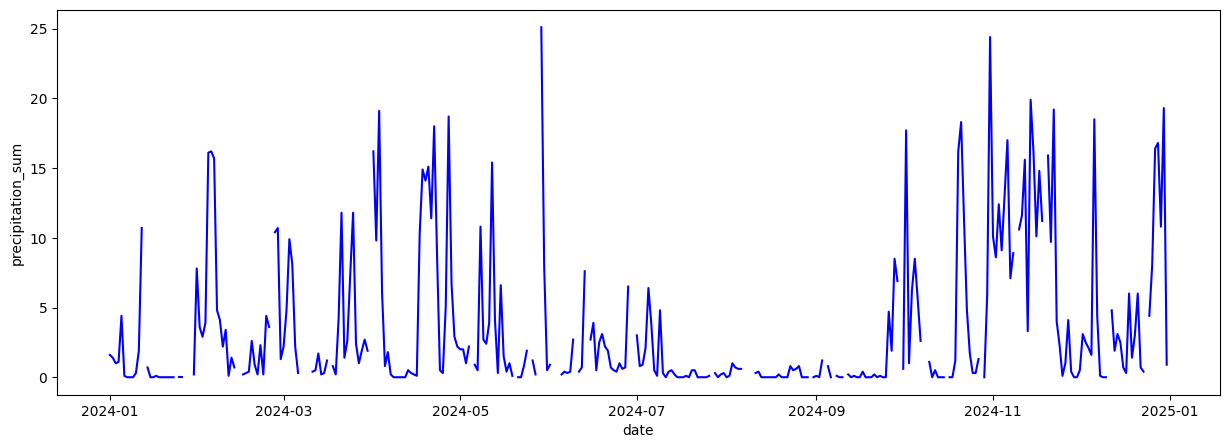

In [32]:
fig, ax = plt.subplots(figsize=(15, 5))
plot = sns.lineplot(
    data=df.loc[df["date"].dt.year == 2024, ["date", "precipitation_sum"]], x="date", y="precipitation_sum"
    , hue=df["precipitation_sum"].isna().cumsum()
    , palette=["blue"]*sum(df["precipitation_sum"].isna())
    , legend=False, markers=True
)

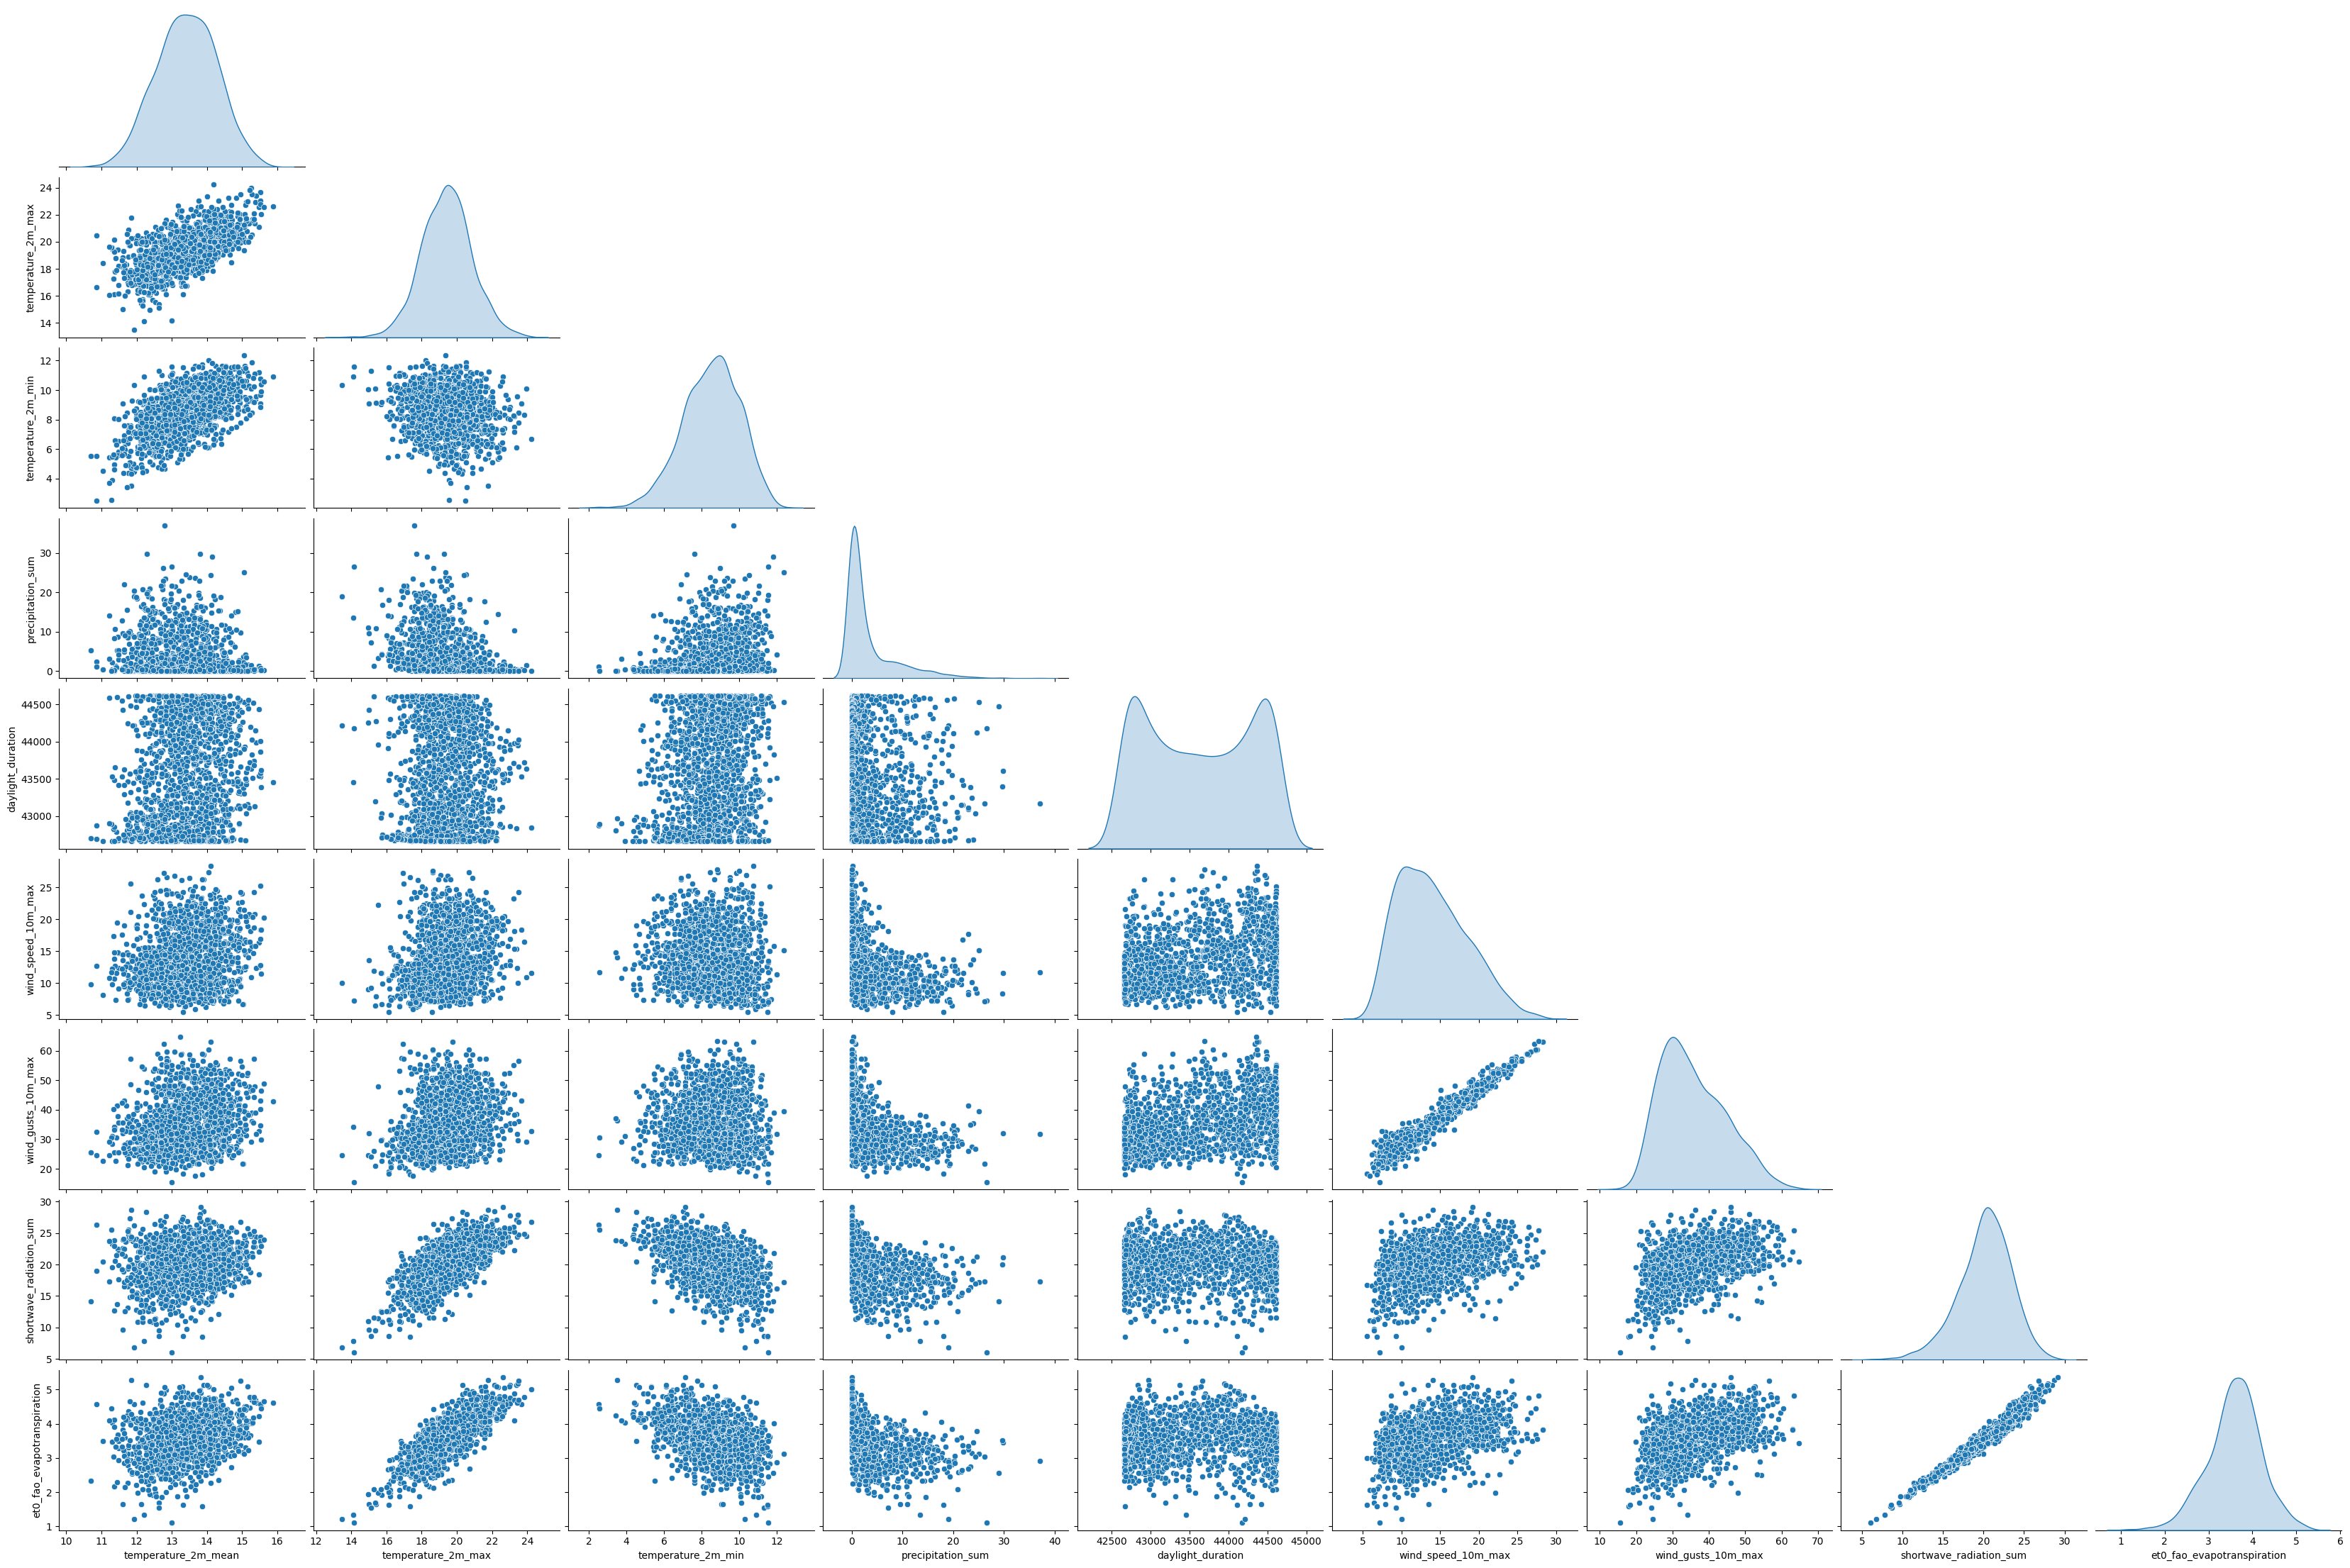

In [28]:
sns.pairplot(df.iloc[:,4:], diag_kind="kde", height=2.5, aspect=1.5, corner=True)

<Axes: >

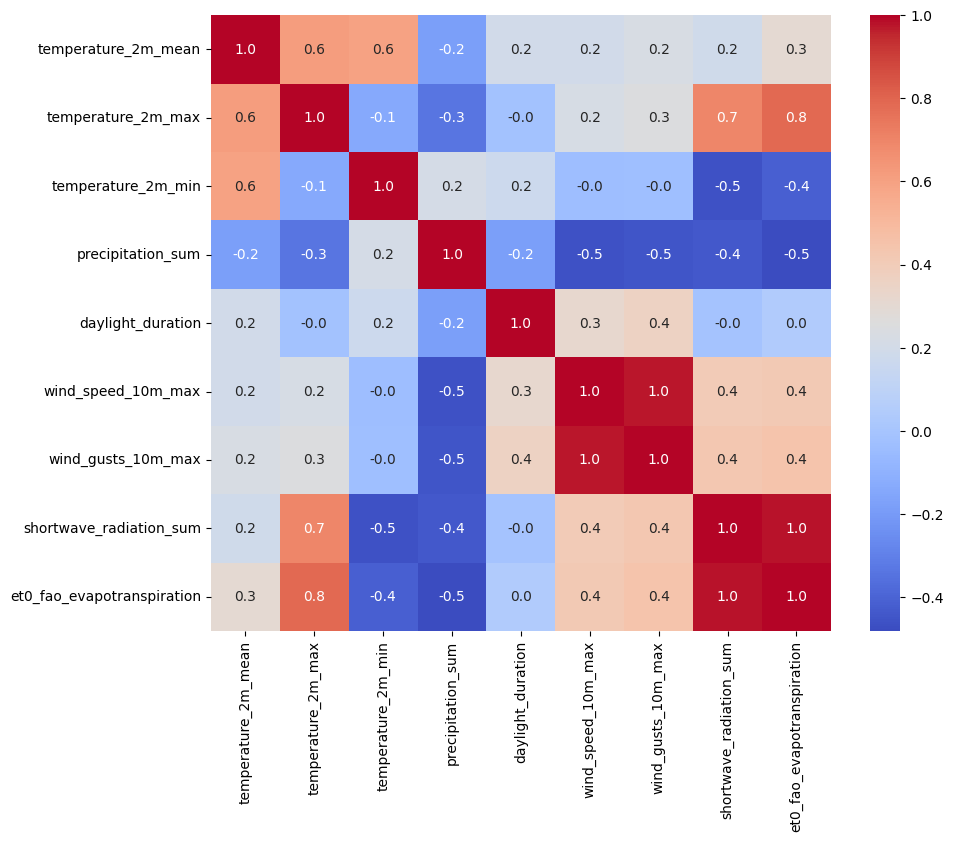

In [29]:
# correlation matrix
corr = df.iloc[:,4:].corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".1f", cmap="coolwarm", ax=ax)